In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Predictor Variables:
      LotArea
0        8450
1        9600
2       11250
3        9550
4       14260
...       ...
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937

[1460 rows x 1 columns]
Dependent Variable:
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64
Regression Parameters:
[180582.48108971  20880.79043039]
Accuracy on Test Set: 8.26%


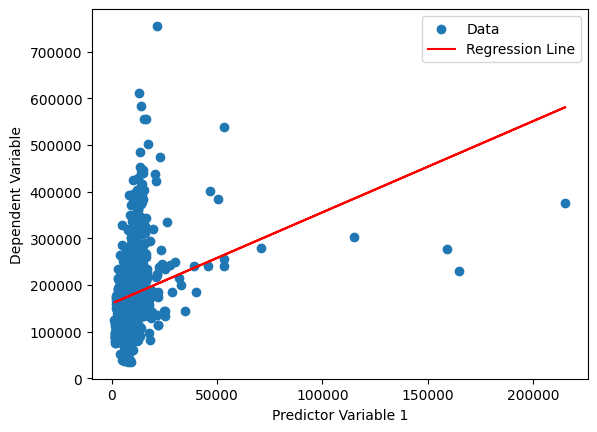

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning data sets/houseprice.csv')

# Convert predictor variables and dependent variable to numeric data types
predictor_variables = dataset.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')
dependent_variable = dataset.iloc[:, -1].apply(pd.to_numeric, errors='coerce')

# Print predictor variables and dependent variable
print("Predictor Variables:")
print(predictor_variables)
print("Dependent Variable:")
print(dependent_variable)

# Calculate the number of training samples
train_samples = int(0.8 * len(dataset))

# Split dataset into training and testing sets
X_train = predictor_variables[:train_samples]
y_train = dependent_variable[:train_samples]
X_test = predictor_variables[train_samples:]
y_test = dependent_variable[train_samples:]

# Perform feature scaling (optional, but recommended for gradient descent)
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Add a column of ones to X_train and X_test for the bias term
X_train = np.c_[np.ones(len(X_train)), X_train]
X_test = np.c_[np.ones(len(X_test)), X_test]

# Initialize the parameters
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
for iteration in range(num_iterations):
    predictions = np.dot(X_train, theta)
    errors = predictions - y_train
    gradient = np.dot(X_train.T, errors) / len(X_train)
    theta -= learning_rate * gradient

# Print regression parameters
print("Regression Parameters:")
print(theta)

# Calculate accuracy on the test set
predictions = np.dot(X_test, theta)
mse = np.mean((predictions - y_test) ** 2)
accuracy = 1 - mse / np.var(y_test)
print("Accuracy on Test Set: {:.2%}".format(accuracy))

# Plot the relationship between each predictor variable and the dependent variable
for i in range(predictor_variables.shape[1]):
  regression_line = np.dot(X_train, theta)
  plt.scatter(predictor_variables.iloc[:train_samples, 0], dependent_variable[:train_samples], label="Data")
  plt.plot(predictor_variables.iloc[:train_samples, 0], regression_line, color='red', label='Regression Line')
  plt.xlabel("Predictor Variable 1")
  plt.ylabel("Dependent Variable")
  plt.legend()
  plt.show()


Predictor Variables:
      Gender     Height
0        NaN  73.847017
1        NaN  68.781904
2        NaN  74.110105
3        NaN  71.730978
4        NaN  69.881796
...      ...        ...
9995     NaN  66.172652
9996     NaN  67.067155
9997     NaN  63.867992
9998     NaN  69.034243
9999     NaN  61.944246

[10000 rows x 2 columns]
Dependent Variable:
0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64
Regression Parameters:
Intercept: -344.7068759895592
Coefficients: [7.64567423]
Accuracy on Test Set: 54.55%


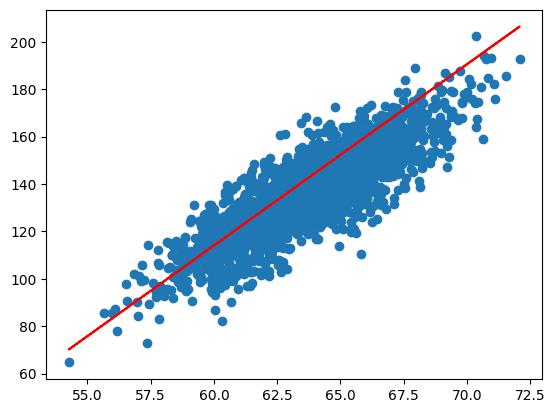

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning data sets/weight-height.csv')

# Convert predictor variables and dependent variable to numeric data types
predictor_variables = dataset.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')
dependent_variable = dataset.iloc[:, -1].apply(pd.to_numeric, errors='coerce')

# Print predictor variables and dependent variable
print("Predictor Variables:")
print(predictor_variables)
print("Dependent Variable:")
print(dependent_variable)

# Calculate the number of training samples
train_samples = int(0.8 * len(dataset))

# Split dataset into training and testing sets
X_train = predictor_variables[:train_samples]
y_train = dependent_variable[:train_samples]
X_test = predictor_variables[train_samples:]
y_test = dependent_variable[train_samples:]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print regression parameters
print("Regression Parameters:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Calculate accuracy (R-squared) on the test set
y_pred = model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy on Test Set: {:.2%}".format(accuracy))

plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color="red")

Predictor Variables:
      LotArea
0        8450
1        9600
2       11250
3        9550
4       14260
...       ...
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937

[1460 rows x 1 columns]
Dependent Variable:
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64
Regression Parameters:
Intercept: 160015.64126957097
Coefficients: [1.95547075]
Accuracy on Test Set: 6.55%


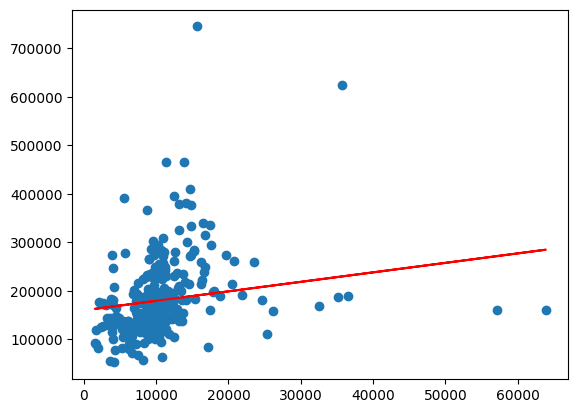

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning data sets/houseprice.csv')

# Convert predictor variables and dependent variable to numeric data types
predictor_variables = dataset.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')
dependent_variable = dataset.iloc[:, -1].apply(pd.to_numeric, errors='coerce')

# Print predictor variables and dependent variable
print("Predictor Variables:")
print(predictor_variables)
print("Dependent Variable:")
print(dependent_variable)

# Calculate the number of training samples
train_samples = int(0.8 * len(dataset))

# Split dataset into training and testing sets
X_train = predictor_variables[:train_samples]
y_train = dependent_variable[:train_samples]
X_test = predictor_variables[train_samples:]
y_test = dependent_variable[train_samples:]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print regression parameters
print("Regression Parameters:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Calculate accuracy (R-squared) on the test set
y_pred = model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy on Test Set: {:.2%}".format(accuracy))

plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color="red")